In [1]:
# TensorFlow, Keras & Layers
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Helper libraries
import pandas as pd
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

# später für Splitting
from sklearn.model_selection import train_test_split

# Versionsübersicht, aus Übung HT 5
print(tf.__version__)
print(tf.config.list_physical_devices())

2.8.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [2]:
# setup eines Ordners wo logs für tensorflow gespeichert werden
# Nummerieren der einzelnen Bilder-Labels (bspw. heels = 1) & dann in Liste data[] zusammenführen. 
# Die Labels der einzelnen Klassen bereiten wir so für die Classification vorbereiten / verwenden
def dataset():
    data=[]
    folders=['boots/','heels/','sneakers/','ballerinas/']
    for index,folder in enumerate(folders):
        initial_count =0
        dir = folder[:-1]
        for path in os.listdir(dir):
            if os.path.isfile(os.path.join(dir, path)):
                initial_count +=1
        for i in range(initial_count):
            a=imread(f'{folder}{i}.jpg')
            data.append([a,index])
    return data

In [3]:
# Jede Liste enthält 
## 1) Image  
## 2) das zugehörige Label (Numerisch) 
data=dataset() # überführe Liste in Array

In [4]:
# erstes Bild als Array
data[0][0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
# das erste Label (numerisch)
data[0][1]

0

0 = boots, war erster Ordner, scheint korrekt

In [6]:
# nehmen wir noch ein späteres Bild, bspw. 700
data[700][1] 

1

1 = heels, somit das 700e Bild aus dem 2. Ordner Heels

#### Labelling / Bildbeschriftung

In [7]:
# Jetzt müssne wir diese numerischen Werte mit bspw. Schuhnamen iterieren, damit wir passende
# Namen für die Labels erhalten 

classes=['boot','heel','sneaker','ballerina'] 

hängen hier mal die "classes" bei zwei Bildern an und schauen, ob da entsprechend die einzelnen Daten die richtigen Label hätten.

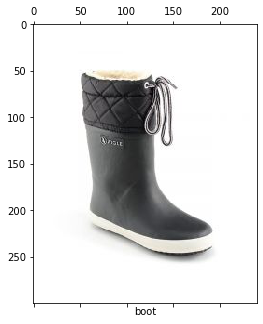

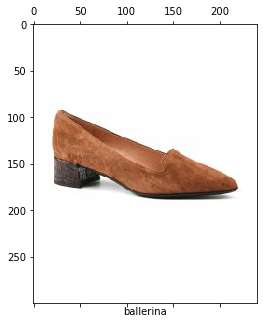

In [8]:
# erstes Bild, sollte Boots sein mit label "boot"
plt.matshow(data[0][0])
plt.xlabel(classes[data[0][1]])
plt.show()

# letztes Bild, sollte Ballerinas sein mit label "ballerina"
plt.matshow(data[-1][0])
plt.xlabel(classes[data[-1][1]])
plt.show()

Konvertieren unsere Data-Array in ein numpy Array, weil
+ kann Daten sehr kompakt speichern
+ gut für mathemathische Operationen, wenn wir dann Bildern schmälern

In [9]:
d=np.array(data) # Dies über numpy, was wir oben importiert hatten

C:\Users\benip\AppData\Local\Temp\ipykernel_20392\1965568783.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  d=np.array(data) # Dies über numpy, was wir oben importiert hatten


In [10]:
# shape zeigt uns, wie viele Zeilen und Colums wir haben...
# 2034 Bilder somit und 2 Spalten, weil 2. Spalte Typ Schuh (0-3)
d.shape 

(2234, 2)

In [11]:
# gleich aufrufbahr wie zuvor, bspw. Nr 700 nochmals
d[700][0] 

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [12]:
# Random-shuffle, damit Bilder verteilt, zufälliger für ML nachher
np.random.shuffle(d) 

In [13]:
x_data=[i[0] for i in d] # getting only image data 
y_data=[i[1] for i in d] # getting only label data

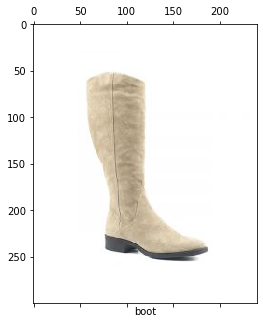

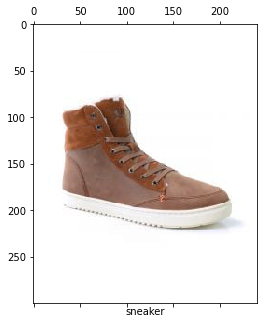

In [14]:
# erstes Bild nach Mischung, wieder mit classes aufgezeigt
plt.matshow(x_data[0]) 
plt.xlabel(classes[y_data[0]])
plt.show()

# letztes Bild nach Mischung, wieder mit classes aufgezeigt
plt.matshow(x_data[-1])
plt.xlabel(classes[y_data[-1]])
plt.show()

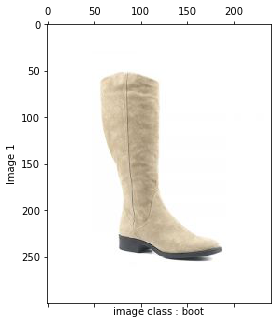

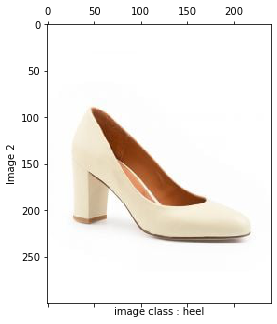

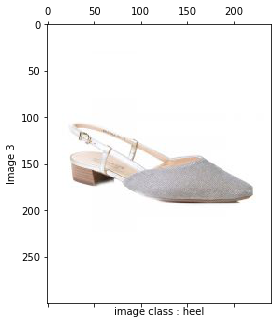

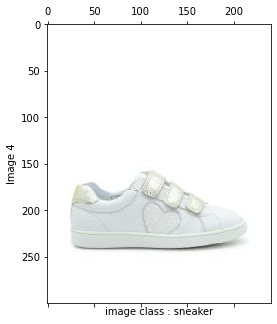

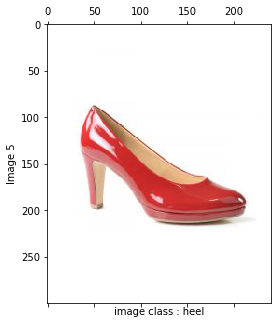

In [15]:
# können uns auch die 5 ersten Bilder anschauen
for i in range(5): 
    plt.matshow(x_data[i])
    plt.xlabel(f'image class : {classes[y_data[i]]}')
    plt.ylabel(f'Image {i+1}')

#### Inspektion der Bilder
also von x_data, weil wirs ja aufgeteilt haben

In [16]:
x_data[0].shape

(300, 240, 3)

In [17]:
x_data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

#### Normalization & Resizing
Normalisieren die Daten zwischen 0 and 1, also geteilt durch 255

Resizen die Bilder auf 150x150 ->  scheint gut zu funktionieren

In [18]:
def resizeShape(image): # resizing our images so less computaion is done and time is saved
    image=tf.cast(image, tf.float32) # converting to float data type
    image=image/255 # scalling the image
    image = tf.image.resize(image, [150, 150]) # resizing der Bilder
    return image

In [19]:
x=map(resizeShape,x_data) # applying for each image array
x=(list(x))

In [20]:
# in ein numpy.array umwandeln
x_data=np.array(x)

In [21]:
x_data[0].shape

(150, 150, 3)

In [22]:
x_data[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

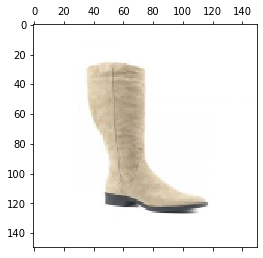

In [23]:
# hier sieht man das Bild jetzt ohne Label, da nur X-Daten
plt.matshow(x_data[0])
plt.show()

### Splitting der Daten

Aufteilen der Daten in Train (90%) & Test (10%)
Die 10% sowie der random state von 42 sind 

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_data, y_data, test_size=0.1, random_state=42) 

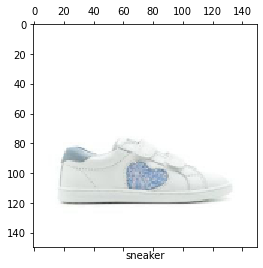

In [25]:
plt.matshow(x_train[0])
plt.xlabel(classes[y_train[0]])
plt.show()

### Konvertieren zu tensorflow

In [26]:
# for training-data
xx= tf.convert_to_tensor(x_train, dtype=tf.float32) 
yy=tf.convert_to_tensor(y_train, dtype=tf.int32)

In [27]:
# for testing data
tx=tf.convert_to_tensor(x_test, dtype=tf.float32)
ty=tf.convert_to_tensor(y_test, dtype=tf.int32)

### Model kreieren & trainieren

In [28]:
# Kreieren ein simples Classification model ohne Convolution layer
# nehmen hier 150x150, da wir es oben resized haben... 
# 3000 und 1000

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(150,150,3)), # flatten zu einem 1D Image 
    tf.keras.layers.Dense(3000,activation='relu'),
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dense(4,activation='sigmoid'),   # 3 as our number of classses is 4
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 3000)              202503000 
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 205,508,004
Trainable params: 205,508,004
Non-trainable params: 0
_________________________________________________________________


In [30]:
# compilen es gleich mit Adam (anscheinend das heutzutage verwendete) und messen accuracy
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) 

In [31]:
# Setting up Tensorboard 

#setup folder where you will save logs for tensorflow 
root_logdir = os.path.join(os.curdir,"my_logs_ADS")


def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [32]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
model.fit(xx,yy,epochs=7,callbacks=[tensorboard_cb]) # Traing our model with 7 epochs

Epoch 1/7
63/63 [==============================] - 81s 1s/step - loss: 52.2468 - accuracy: 0.4353
Epoch 2/7
63/63 [==============================] - 71s 1s/step - loss: 0.9027 - accuracy: 0.6816
Epoch 3/7
63/63 [==============================] - 54s 852ms/step - loss: 0.6729 - accuracy: 0.7423
Epoch 4/7
63/63 [==============================] - 54s 852ms/step - loss: 0.5787 - accuracy: 0.7856
Epoch 5/7
63/63 [==============================] - 55s 875ms/step - loss: 0.5459 - accuracy: 0.8065
Epoch 6/7
63/63 [==============================] - 57s 903ms/step - loss: 0.6288 - accuracy: 0.7567
Epoch 7/7
63/63 [==============================] - 55s 867ms/step - loss: 0.6785 - accuracy: 0.7493


In [33]:
%load_ext tensorboard
%tensorboard --logdir my_logs_ADS

Reusing TensorBoard on port 6006 (pid 11484), started 2 days, 22:40:10 ago. (Use '!kill 11484' to kill it.)

### Evaluate Accuracy

In [34]:
# wie macht sich das Model für die Testdaten?
model.evaluate(tx,ty) 

7/7 [==============================] - 1s 143ms/step - loss: 0.5691 - accuracy: 0.8125


[0.5691363215446472, 0.8125]

81% sind noch nicht so gut, wie wir das möchten...

### Model kreieren & trainieren - CNN

In [35]:
model2=tf.keras.Sequential([
    #1st Convolution layer mit  64 filtern - 3by3
    tf.keras.layers.Convolution2D(filters=64,kernel_size=(5,5),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    #2nd Convolution layer mit  128 filtern - 3by3
    tf.keras.layers.Convolution2D(filters=128,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    #3rd Convolution layer mit  256 filtern - 3by3
    tf.keras.layers.Convolution2D(filters=256,kernel_size=(2,2),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax'), # wirkt anscheinend besser für Classification
    
    
])

In [36]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
model2.fit(xx,yy,epochs=7,callbacks=[tensorboard_cb]) # Traing our model with 7 epochs

Epoch 1/7
63/63 [==============================] - 87s 1s/step - loss: 0.7541 - accuracy: 0.7428
Epoch 2/7
63/63 [==============================] - 88s 1s/step - loss: 0.3310 - accuracy: 0.8831
Epoch 3/7
63/63 [==============================] - 87s 1s/step - loss: 0.2365 - accuracy: 0.9144
Epoch 4/7
63/63 [==============================] - 86s 1s/step - loss: 0.1645 - accuracy: 0.9363
Epoch 5/7
63/63 [==============================] - 90s 1s/step - loss: 0.1095 - accuracy: 0.9537
Epoch 6/7
63/63 [==============================] - 88s 1s/step - loss: 0.0860 - accuracy: 0.9612
Epoch 7/7
63/63 [==============================] - 83s 1s/step - loss: 0.0722 - accuracy: 0.9741


wir haben  97% when we used Convolution layer in our model

In [38]:
%load_ext tensorboard
%tensorboard --logdir my_logs_ADS

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11484), started 2 days, 22:50:21 ago. (Use '!kill 11484' to kill it.)

### Evaluate Model - CNN

In [39]:
# wie macht sich das Model für die Testdaten?
model2.evaluate(tx,ty) 

7/7 [==============================] - 2s 227ms/step - loss: 0.1396 - accuracy: 0.9509


[0.13960395753383636, 0.9508928656578064]

95% accuracy für test data, ziemlich gut

### Make Predictions mit dem Model

In [40]:
predictions = model2.predict(tx)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [46]:
predictions[1]

array([5.2342599e-04, 2.7144821e-02, 9.6708083e-01, 5.2509438e-03],
      dtype=float32)

A prediction is an array of 4 numbers. They represent the model's "confidence" that the image 
corresponds to each of the 4 different articles of shoes. You can see which label has the highest confidence value:

In [47]:
np.argmax(predictions[1])

2

So, the model is most confident that this image is the number 3, from 0-3 would be ['boot','heel','sneaker','ballerina']
Examining the test label shows that this classification is correct

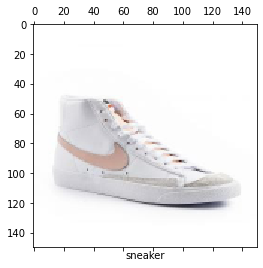

In [48]:
plt.matshow(tx[1])
plt.xlabel(classes[ty[1]])
plt.show()

### mit neuen Bildern testen?

diese mit selenium (API) holen / herunterladen

#### Test 1 - mit Sneakers

In [49]:
import os
os.chdir(r'C:\Users\benip\OneDrive\ZHAW\2 Term\Di, 12.50-16.45 (ADS) Applied Data Science\Projekt ADS FS 2022')

# Warnings settings
import warnings
warnings.filterwarnings("ignore")

ua_path = "user_agents.txt"
ua_list = [line.rstrip('\n') for line in open(ua_path)]
ua_list[:5]

['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0',
 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_2) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.4 Safari/605.1.15']

In [50]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import random

# Set options
opts = Options()
opts.add_argument('--ignore-certificate-errors')
opts.add_argument("--test-type")
opts.add_argument("user-agent=" + random.choice(ua_list))
driver = webdriver.Chrome(executable_path='chromedriver.exe', options=opts)

# Website to scrape
driver.get('https://www.dosenbach.ch/de-ch/herren-schuhe/sneaker/c-mss3')

images = driver.find_elements_by_tag_name('img')
for image in images:
    print(image.get_attribute('src'))

#<img _ngcontent-dos-c30="" loading="lazy" src="https://media.deichmann.com/asset/deichmann/product-h6-list/p_mosaic_pl/--2063881_HL1.jpg" alt="" class="lazyloaded">

# Close driver
driver.close()

https://www.dosenbach.ch/de-ch/medias/3-DOS-WB-3-RGB.jpg?context=bWFzdGVyfHJvb3R8MzI4Njg5fGltYWdlL2pwZWd8aGJiL2gxYi84ODMzNzc5OTI1MDIyLmpwZ3wzYjBiYWU5NTdlMDk5ZjQ5ZmU3YjAzMGFjNzJkYTc4ZmIyMGJmNTdlNjM3NTM0ZDllMzE0NjE1OGM3MGQ3YTVl
https://www.dosenbach.ch/de-ch/medias/appformat-360x360-damen-1021.jpg?context=bWFzdGVyfHJvb3R8MzkzOTF8aW1hZ2UvanBlZ3xoMjkvaDg2Lzg5MDA4NDA3NTExMzQuanBnfDdmYWI3YjQxZDIzNjc0N2M0MTBkOTUxYjI3YmZhYmNkZGIzYzM2MWEyODljZWVlNjdmMzJkZTVjNzU1NzMxMTk
https://www.dosenbach.ch/de-ch/medias/appformat-360x360-herren-1021.jpg?context=bWFzdGVyfHJvb3R8MzY3ODN8aW1hZ2UvanBlZ3xoNjYvaDA2Lzg5MDA4NDA4MTY2NzAuanBnfDcyODM3NThmNWFmNjUyNmQ2NDk3MjVkNzcxNTZiNGNjMGM1Yzk0NDhhNWRjNjM0MjdlNzNkYmZhODMwZTk3MzY
https://www.dosenbach.ch/de-ch/medias/appformat-360x360-kids-1021.jpg?context=bWFzdGVyfHJvb3R8MzgxNDV8aW1hZ2UvanBlZ3xoMWUvaGU4Lzg5MDA4NDA4ODIyMDYuanBnfDg4NzFhMzFlYTg2YzUwYWZkZjY4ODM2YjAwNDhhYjA4NmMzYTE0OWQwYmYzZTIxZjVkYjM0ZmFlNDA5MDVkNjc
https://www.dosenbach.ch/de-ch/medias/appformat-360x360-d

https://www.dosenbach.ch/de-ch/medias/at.svg?context=bWFzdGVyfGltYWdlc3wxMzA0fGltYWdlL3N2Zyt4bWx8aW1hZ2VzL2gxOS9oOGQvODc5ODYyMDQxODA3OC5zdmd8YzQ3YWIwMDU2NGFlYzU2ZWJmZGYxMDllZjc2M2ZkMGYwMjllYTAyYzc2ZDU4MWE1YWE3ZDM4ZWYzOTVlNjkwNQ
https://www.dosenbach.ch/de-ch/medias/fr.svg?context=bWFzdGVyfGltYWdlc3wyOTJ8aW1hZ2Uvc3ZnK3htbHxpbWFnZXMvaDlhL2hkOS84Nzk4NjIwNzEyOTkwLnN2Z3wwMDZkZmU5ZTAzNDBhYWUwMDI4ZGY1YWY0YmRlMTAwOGM0NDdiNmRlYmYwOGQ4MWVlNWQzZGE5NzkwZjg3ODky
https://www.dosenbach.ch/de-ch/medias/es.svg?context=bWFzdGVyfGltYWdlc3w5MjA2MXxpbWFnZS9zdmcreG1sfGltYWdlcy9oYzkvaGJkLzg3OTg2MjA2ODAyMjIuc3ZnfDY2NWIyYzllNDU2ZjhmNTRlMmUzZWU5NTc3NjBiYzBkMGRmNjdlYTdmZTM3ZDI0ZTUzYmQ5ZWNlZmZlNjIwNjM
https://www.dosenbach.ch/de-ch/medias/hr.svg?context=bWFzdGVyfGltYWdlc3w0MTU4OHxpbWFnZS9zdmcreG1sfGltYWdlcy9oNDMvaGM2Lzg3OTg2MjA3Nzg1MjYuc3ZnfGU5MTVkNWNhZTVjOGFmZmE3YWU2Y2E3MDdjYjM0ZjVjYmFjM2E3ODcwMWYxNWI1NzkzMDI2ZjkxNDI5N2E5NzA
https://www.dosenbach.ch/de-ch/medias/it.svg?context=bWFzdGVyfGltYWdlc3wyOTJ8aW1hZ2Uvc3Z

In [64]:
# downloading one picture with urlib
import urllib.request
urllib.request.urlretrieve("https://media.deichmann.com/asset/deichmann/product-h6-list/p_mosaic_pl/--2065261_HL1.jpg", "sneakers-test.jpg")

('sneakers-test.jpg', <http.client.HTTPMessage at 0x2092ef3c8e0>)

#### Testing Prediction mit neuem Foto - Sneakers

Prediction zu Klassen: boot, heel, sneaker, ballerina
 [0 0 1 0]


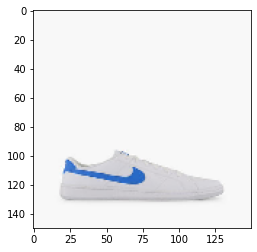

In [65]:
img = tf.keras.utils.load_img("sneakers-test.jpg", target_size=(150,150))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Add the image to a batch where it's the only member.


prediction = model2.predict_on_batch(img_array).flatten()
prediction = tf.where(prediction < 0.5, 0, 1)

print('Prediction zu Klassen: boot, heel, sneaker, ballerina\n', prediction.numpy())

plt.imshow(img)

#### Test 2 - mit Boots

In [57]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import random

# Set options
opts = Options()
opts.add_argument('--ignore-certificate-errors')
opts.add_argument("--test-type")
opts.add_argument("user-agent=" + random.choice(ua_list))
driver = webdriver.Chrome(executable_path='chromedriver.exe', options=opts)

# Website to scrape
driver.get('https://www.dosenbach.ch/de-ch/search?text=boot')

images = driver.find_elements_by_tag_name('img')
for image in images:
    print(image.get_attribute('src'))

#<img _ngcontent-dos-c30="" loading="lazy" src="https://media.deichmann.com/asset/deichmann/product-h6-list/p_mosaic_pl/--2063881_HL1.jpg" alt="" class="lazyloaded">

# Close driver
driver.close()

https://www.dosenbach.ch/de-ch/medias/3-DOS-WB-3-RGB.jpg?context=bWFzdGVyfHJvb3R8MzI4Njg5fGltYWdlL2pwZWd8aGJiL2gxYi84ODMzNzc5OTI1MDIyLmpwZ3wzYjBiYWU5NTdlMDk5ZjQ5ZmU3YjAzMGFjNzJkYTc4ZmIyMGJmNTdlNjM3NTM0ZDllMzE0NjE1OGM3MGQ3YTVl
https://www.dosenbach.ch/de-ch/medias/appformat-360x360-damen-1021.jpg?context=bWFzdGVyfHJvb3R8MzkzOTF8aW1hZ2UvanBlZ3xoMjkvaDg2Lzg5MDA4NDA3NTExMzQuanBnfDdmYWI3YjQxZDIzNjc0N2M0MTBkOTUxYjI3YmZhYmNkZGIzYzM2MWEyODljZWVlNjdmMzJkZTVjNzU1NzMxMTk
https://www.dosenbach.ch/de-ch/medias/appformat-360x360-herren-1021.jpg?context=bWFzdGVyfHJvb3R8MzY3ODN8aW1hZ2UvanBlZ3xoNjYvaDA2Lzg5MDA4NDA4MTY2NzAuanBnfDcyODM3NThmNWFmNjUyNmQ2NDk3MjVkNzcxNTZiNGNjMGM1Yzk0NDhhNWRjNjM0MjdlNzNkYmZhODMwZTk3MzY
https://www.dosenbach.ch/de-ch/medias/appformat-360x360-kids-1021.jpg?context=bWFzdGVyfHJvb3R8MzgxNDV8aW1hZ2UvanBlZ3xoMWUvaGU4Lzg5MDA4NDA4ODIyMDYuanBnfDg4NzFhMzFlYTg2YzUwYWZkZjY4ODM2YjAwNDhhYjA4NmMzYTE0OWQwYmYzZTIxZjVkYjM0ZmFlNDA5MDVkNjc
https://www.dosenbach.ch/de-ch/medias/appformat-360x360-d

https://www.dosenbach.ch/de-ch/medias/pt.svg?context=bWFzdGVyfGltYWdlc3w4MzY5fGltYWdlL3N2Zyt4bWx8aW1hZ2VzL2g5YS9oZjcvODc5ODYyMDk3NTEzNC5zdmd8ZTU3NDVmMTM0ZTAwM2Q4OTYzYWIxMTI2ODczOGQxOTE5ZjAyZjYzNGI4MWU4Y2JkZDQwNTc3ZDljMDNiMmUzNA
https://www.dosenbach.ch/de-ch/medias/ru.svg?context=bWFzdGVyfGltYWdlc3wyODZ8aW1hZ2Uvc3ZnK3htbHxpbWFnZXMvaDhiL2g5Mi84Nzk4NjIxMDczNDM4LnN2Z3xmZmQyZmJmODI4ZDgzYzVmYjc4OWMzMzYxNGY1YzBmZTk3ZmNlYzc4MzFjOTBmYmFmNTM2NjJjNzMyYjcxMjhi
https://www.dosenbach.ch/de-ch/medias/be.svg?context=bWFzdGVyfGltYWdlc3wyOTB8aW1hZ2Uvc3ZnK3htbHxpbWFnZXMvaGU3L2gwYS84Nzk4NjIwNDUwODQ2LnN2Z3w3ZmM1NzI0NTU0NjhiZGZkZjFhZTI1ZWU3Y2MzYTFjZjBlZDI4OTJlZjQ0MmU0NDBmYTE2MThkYzRlZDZhYTc5
https://www.dosenbach.ch/de-ch/medias/Deichmann-min.jpg?context=bWFzdGVyfHJvb3R8MTM5OHxpbWFnZS9qcGVnfGhmZC9oZTkvODc5OTI3ODk1NjU3NC5qcGd8YWU3NmUxYzAyMGU5MjQ1OTI1ZGUzYzE4MjdkOWQ0YmNhZDA0M2M0YmIwZWFkYjRkMGRmNGM2MDNkMGE0NWJkYw


In [58]:
# downloading one picture with urlib
import urllib.request
urllib.request.urlretrieve("https://media.deichmann.com/asset/deichmann/product-h6-list/p_mosaic_pl/--2029799_HL1.jpg", "boots-test.jpg")

('boots-test.jpg', <http.client.HTTPMessage at 0x2092ed1f610>)

#### Testing Prediction mit neuem Foto - Sneakers

Prediction zu Klassen: boot, heel sneaker ballerina
 [1 0 0 0]


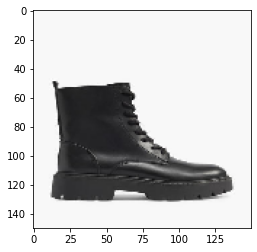

In [59]:
img = tf.keras.utils.load_img("boots-test.jpg", target_size=(150,150))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Add the image to a batch where it's the only member.


prediction = model2.predict_on_batch(img_array).flatten()
prediction = tf.where(prediction < 0.5, 0, 1)

print('Prediction zu Klassen: boot, heel sneaker ballerina\n', prediction.numpy())

plt.imshow(img)